In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stat
import matplotlib.pyplot as plt

In [3]:
import scipy.optimize as optimize
import scipy.special as sp

In [4]:
import random as rand
import time
import math
import copy as deepcopy
import copy

In [5]:
df = pd.read_csv('../Data_All_180906/CSV/Forecasting AI Progress v1.0.csv')

In [6]:
np.random.seed(12345678)

In [7]:
df = df.iloc[:,9:]

In [8]:
df.columns = ['name','surname','employer','job','Q1',
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13']

In [9]:
dfx = pd.read_csv('../Data_All_180906/CSV/altdata.csv',keep_default_na=False)
df4 = dfx.iloc[:,7:]
df4.columns = ['role','demo','name','surname','employer','job','Q1',
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13']
demo = df4.demo
roles = df4.role
demo = np.asarray(demo)
roles = np.asarray(roles)
print(demo.shape)
print(roles.shape)
role = np.zeros(demo.shape[0]+1)
region = np.zeros(demo.shape[0]+1)
gender = np.zeros(demo.shape[0]+1)
for i in range(0,demo.shape[0]-1):
    try:
        vals = demo[i+1].split(',')
        #print (vals)
        if vals[0] == 'EU':
            region[i+1] = 0
        elif vals[0] == 'A':
            region[i+1] = 1
        elif vals[0] == 'NA':
            region[i+1] = 2
        elif vals[0] == 'O':
            region[i+1] = 3
        elif vals[0] == 'X':
            region[i+1] = -1
        elif vals[0] == 'SA':
            region[i+1] = 3
        elif vals[0] == 'AR':
            region[i+1] = 3
        else:
            region[i+1] = -1
            #print(vals[0])
        try:
            if vals[1] == 'f':
                gender[i+1] = 0
            else:
                gender[i+1] = 1
        except:
            gender[i+1] = 1
    except:
        region[i+1] = -1
        gender[i+1] = -1
    if roles[i+1] == 'phd': #grad student
        role[i+1] = 0
    elif roles[i+1] == 'prof': #academic
        role[i+1] = 1
    elif roles[i+1] == 'r': #industry research
        role[i+1] = 2
    elif roles[i+1] == 'eng': #industry engineer
        role[i+1] = 3
    elif roles[i+1] == 'exec': #industry executive
        role[i+1] = 4
    elif roles[i+1] == 'f': #founder
        role[i+1] = 5
    else: role[i+1] = -1   
region_df = pd.DataFrame(region)
gender_df = pd.DataFrame(gender)
role_df = pd.DataFrame(role)
df['region'] = region_df
df['gender'] = gender_df
df['role'] = role_df

(230,)
(230,)


In [10]:
df = df.dropna(subset=['name','surname','employer','job'])

### Naive calibration A 

In [11]:
df['weight'] = 1.
df2 = df.iloc[1:]
df2.Q1 = pd.to_numeric(df2.Q1)
mask = df2.Q1 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q1 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q2 = pd.to_numeric(df2.Q2)
mask = df2.Q2 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q2 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q3 = pd.to_numeric(df2.Q3)
mask = df2.Q3 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q3 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q4 = pd.to_numeric(df2.Q4)
mask = df2.Q4 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q4 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Naive calibration B 

In [12]:
df3 = df.iloc[1:]
df3.Q1 = pd.to_numeric(df3.Q1)
mask = df3.Q1 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q1 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q2 = pd.to_numeric(df3.Q2)
mask = df3.Q2 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q2 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q3 = pd.to_numeric(df3.Q3)
mask = df3.Q3 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q3 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q4 = pd.to_numeric(df3.Q4)
mask = df3.Q4 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q4 == 100
df3.loc[mask, 'weight'] = 0.

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
q1 = df.Q1
q2 = df.Q2
q3 = df.Q3
q4 = df.Q4
q5 = df[['Q5a','Q5b','Q5c']]
q6 = df[['Q6a','Q6b','Q6c']]
q7 = df[['Q7a','Q7b','Q7c']]
q8 = df[['Q8a','Q8b','Q8c']]
q9 = df[['Q9a','Q9b','Q9c']]
q10 = df[['Q10a','Q10b','Q10c']]
q11 = df.Q11
q12 = df.Q12
q13 = df.Q13

In [14]:
q1 = q1.dropna()
q2 = q2.dropna()
q3 = q3.dropna()
q4 = q4.dropna()
q5 = q5.dropna()
q6 = q6.dropna()
q7 = q7.dropna()
q8 = q8.dropna()
q9 = q9.dropna()
q10 = q10.dropna()
q11 = q11.dropna()
q12 = q12.dropna()
q13 = q13.dropna()

In [15]:
q9 = q9.iloc[1:]
q9 = q9.astype(float)
q9.head()

,Q9a,Q9b,Q9c
1,2025.0,2028.0,2031.0
3,2050.0,2070.0,2100.0
4,20.0,30.0,40.0
5,5.0,15.0,20.0
6,30.0,50.0,80.0


In [16]:
mask = q9.Q9a > 2000
mask2 = q9.Q9a < 3000
mask = mask*mask2
q9.loc[mask, 'Q9a'] = q9.Q9a - 2018
q9.loc[mask, 'Q9b'] = q9.Q9b - 2018
q9.loc[mask, 'Q9c'] = q9.Q9c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [17]:
q9b = df2[['Q9a','Q9b','Q9c','weight']]
q9b = q9b.dropna()
q9b = q9b.astype(float)
mask = q9b.Q9a > 2000
mask2 = q9b.Q9a < 3000
mask = mask*mask2
q9b.loc[mask, 'Q9a'] = q9b.Q9a - 2018
q9b.loc[mask, 'Q9b'] = q9b.Q9b - 2018
q9b.loc[mask, 'Q9c'] = q9b.Q9c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [18]:
q9c = df3[['Q9a','Q9b','Q9c','weight']]
q9c = q9c.dropna()
q9c = q9c.astype(float)
mask = q9c.Q9a > 2000
mask2 = q9c.Q9a < 3000
mask = mask*mask2
q9c.loc[mask, 'Q9a'] = q9c.Q9a - 2018
q9c.loc[mask, 'Q9b'] = q9c.Q9b - 2018
q9c.loc[mask, 'Q9c'] = q9c.Q9c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [19]:
q9d = df3[['Q9a','Q9b','Q9c','weight']]
q9d = q9d.dropna()
q9d = q9d.astype(float)
mask = q9d.Q9a > 2000
mask2 = q9d.Q9a < 3000
mask = mask*mask2
q9d.loc[mask, 'Q9a'] = q9d.Q9a - 2018
q9d.loc[mask, 'Q9b'] = q9d.Q9b - 2018
q9d.loc[mask, 'Q9c'] = q9d.Q9c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


### Fitting to Gamma CDF 

In [20]:
#Manually handling extreme responses
extremeResponses = [14,56,100,102,120,134,164,222]

In [21]:
for i in extremeResponses:
    q9.loc[i]['Q9a'] = 1000
    q9.loc[i]['Q9b'] = 10000
    q9.loc[i]['Q9c'] = 100000

In [22]:
q9 = q9[q9.Q9c >= 0.000001]
q9 = q9[q9.Q9c-q9.Q9b >= 0.000001]
q9 = q9[q9.Q9c-q9.Q9a >= 0.000001]
q9 = q9[q9.Q9a <= 5000]
q9 = q9[q9.Q9b <= 5000]
q9 = q9[q9.Q9c <= 5000]
q9.shape[0]

141

In [23]:
for i in extremeResponses:
    q9b.loc[i]['Q9a'] = 1000
    q9b.loc[i]['Q9b'] = 10000
    q9b.loc[i]['Q9c'] = 100000
q9b = q9b[q9b.Q9c >= 0.000001]
q9b = q9b[q9b.Q9c-q9b.Q9b >= 0.000001]
q9b = q9b[q9b.Q9c-q9b.Q9a >= 0.000001]
q9b = q9b[q9b.Q9a <= 5000]
q9b = q9b[q9b.Q9b <= 5000]
q9b = q9b[q9b.Q9c <= 5000]
q9b.shape[0]

141

In [24]:
for i in extremeResponses:
    q9c.loc[i]['Q9a'] = 1000
    q9c.loc[i]['Q9b'] = 10000
    q9c.loc[i]['Q9c'] = 100000
q9c = q9c[q9c.Q9c >= 0.000001]
q9c = q9c[q9c.Q9c-q9c.Q9b >= 0.000001]
q9c = q9c[q9c.Q9c-q9c.Q9a >= 0.000001]
q9c = q9c[q9c.Q9a <= 5000]
q9c = q9c[q9c.Q9b <= 5000]
q9c = q9c[q9c.Q9c <= 5000]
q9c.shape[0]

141

In [25]:
q9c.Q9a.median()

25.0

In [26]:
q9c.Q9b.median()

50.0

In [27]:
q9c.Q9c.median()

99.0

In [28]:
q9c.Q9a.mean()

41.787234042553195

In [29]:
q9c.Q9b.mean()

78.09929078014184

In [30]:
q9c.Q9c.mean()

174.82978723404256

In [31]:
ydata = [0.1,0.5,0.9]

In [32]:
xdata = np.asarray(q9)

In [33]:
def ff(params,xdata,ydata):
    return xdata-params[1]*sp.gammaincinv(params[0],ydata)

In [34]:
x0f = np.array([9.,1.])

In [35]:
paramsf = optimize.least_squares(ff, x0f, args=(xdata[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datz = np.zeros(xdata.shape[0]*3)
dataxx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)  
for i in range(1000):
    if dataxx[i] > 5000.:
        dataxx[i] = 5000.
datz[0] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
datz[1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
datz[2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
datayy = stat.gamma.cdf(dataxx,paramsf.x[0], 0., scale=paramsf.x[1])
for i in range(1,q9.shape[0]):
    paramsf = optimize.least_squares(ff, x0f, args=(xdata[i], ydata),max_nfev=1000,
                                tr_solver='exact')
    datz[i*3] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
    dataxx = np.concatenate((dataxx,stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)),axis=0)
    datayy = np.concatenate((datayy,stat.gamma.cdf(dataxx[i*1000:],paramsf.x[0], 0., scale=paramsf.x[1])),axis=0)

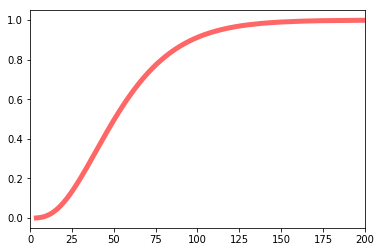

22.088864459368637
50.42204284808361
96.63148715447159


In [36]:
m10 = np.median(datz[::3])
m50 = np.median(datz[1::3])
m90 = np.median(datz[2::3])
paramsz = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                tr_solver='exact')
datzx = stat.gamma.rvs(paramsz.x[0], 0., scale=paramsz.x[1], size=1000)  
for i in range(1000):
    if datzx[i] > 5000.:
        datzx[i] = 5000.
datzx.sort()
datzx[-1] = 200.
datzy = stat.gamma.cdf(datzx,paramsz.x[0], 0., scale=paramsz.x[1])
plt.plot(datzx, stat.gamma.cdf(datzx, paramsz.x[0], 0., paramsz.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
plt.show()
print(stat.gamma.ppf(.1, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.5, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.9, paramsz.x[0], 0., paramsz.x[1]))

In [37]:
outx = np.zeros((datzx.shape[0]))
outy = np.zeros((datzy.shape[0]))
outx = pd.DataFrame(datzx)
outy = pd.DataFrame(datzy)
outy.to_csv('no9y.csv')
outx.to_csv('no9x.csv')

## Bootstrap

In [38]:
def gbootstrap(xdata):
    bstrap = np.zeros(xdata.shape)
    for i in range(xdata.shape[0]):
        randidx = rand.randrange(xdata.shape[0])
        dat = xdata[randidx,:]
        bstrap[i,:] = dat
    return bstrap

In [39]:
def compute_ci(intrp, confidence = 0.95):
    avg = np.zeros((intrp.shape[1]),dtype = 'float32')
    lb   = np.zeros((intrp.shape[1]),dtype = 'float32')
    up   = np.zeros((intrp.shape[1]),dtype = 'float32')
    pz = (1.0-confidence)/2.0
    print(intrp.shape)
    for i in range(intrp.shape[1]):
        vec = intrp[:,i]
        vec.sort()
        avg[i] = np.average(vec)
        lb[i] = vec[math.floor(pz*len(vec))]
        up[i] = vec[math.floor((1.0-pz)*len(vec))]
    return avg,lb,up

In [40]:
xdata.shape

(141, 3)

In [41]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 141
for i in range(nbstraps):
    bstrap = gbootstrap(xdata)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')    

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


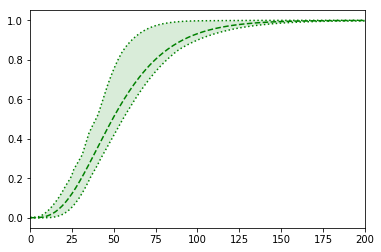

In [42]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.95)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals") # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':') 
plt.xlim(0,200)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()

In [43]:
out = np.zeros((intrp_.shape[0],4))
for i in range(intrp_.shape[0]):
    out[i,0] = intrp_[i]
    out[i,1] = avg[i]
    out[i,2] = lb[i]
    out[i,3] = ub[i]
out = pd.DataFrame(out)
out.to_csv('no9.csv')

# Conference Bootstrap 

In [44]:
xhlai = q9c[q9c.index <= 57]
xhlai = np.asarray(xhlai[['Q9a','Q9b','Q9c']])
xijcai = q9c[q9c.index > 57]
xijcai = np.asarray(xijcai[['Q9a','Q9b','Q9c']])

In [45]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xhlai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


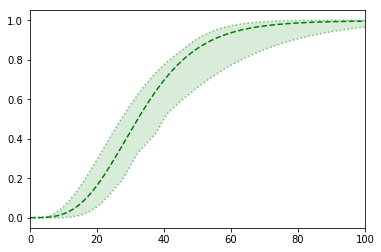

In [46]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()
ihlai = copy.deepcopy(intrp_)

In [47]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xijcai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


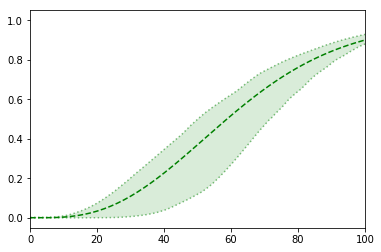

In [48]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg9, lb9, ub9 = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg9, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb9, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub9, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb9, ub9, facecolor=clr, alpha=0.15)
plt.show()
iijcai = copy.deepcopy(intrp_)

In [49]:
plt.clf()
ax = plt.gca()
clr = 'darkcyan'
plt.plot(ihlai, avg, color=clr, ls='--', label="99% Narrow HLAI")
plt.plot(ihlai, lb, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(ihlai, ub, color=clr, ls=':',alpha=0.75) # , label = "ub")
ax.fill_between(ihlai, lb, ub, facecolor=clr, alpha=0.25)
clr = 'grey'
plt.plot(iijcai, avg9, color=clr, ls='--', label="99% Narrow IJCAI")
plt.plot(iijcai, lb9, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(iijcai, ub9, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(iijcai, lb9, ub9, facecolor=clr, alpha=0.25)

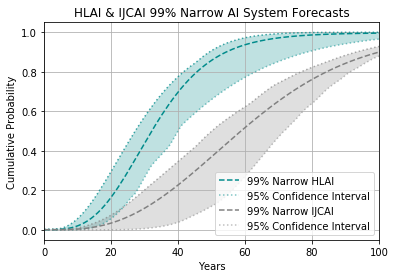

In [50]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('HLAI & IJCAI 99% Narrow AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('Q9-hlai-ijcai-cis.png')
plt.show()

In [52]:
np.median(xhlai[:,0])

20.0

In [51]:
np.median(xhlai[:,1])

30.0

In [53]:
np.median(xhlai[:,2])

50.0

In [54]:
np.median(xijcai[:,0])

30.0

In [55]:
np.median(xijcai[:,1])

50.0

In [56]:
np.median(xijcai[:,2])

100.0